## Edureka ChatGPT Project #2

### This notebook was created by using ChatGTP to provide the code needed to analyze the online delivery data set that was provided by Edureka for this project.  

#### Kelly Anderson -- 09/20/2023


In [1]:


#!pip install PyPDF2
import PyPDF2

import openai
import os

import pandas as pd

import matplotlib.pyplot as plt

In [2]:

# Create a DataFrame from the data
df = pd.read_csv('onlinedeliverydata.csv')



# Display the first few rows of the dataset
df.head()

len(df)

# Summary statistics
print(df.describe())

data = df


              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


# The next group of cells are meeting the project requirement of: 

## 1.	Understand the Data 

## 2. Perform Exploratory data analysis 

Summary Statistics for Age:
              Age
count  388.000000
mean    24.628866
std      2.975593
min     18.000000
25%     23.000000
50%     24.000000
75%     26.000000
max     33.000000


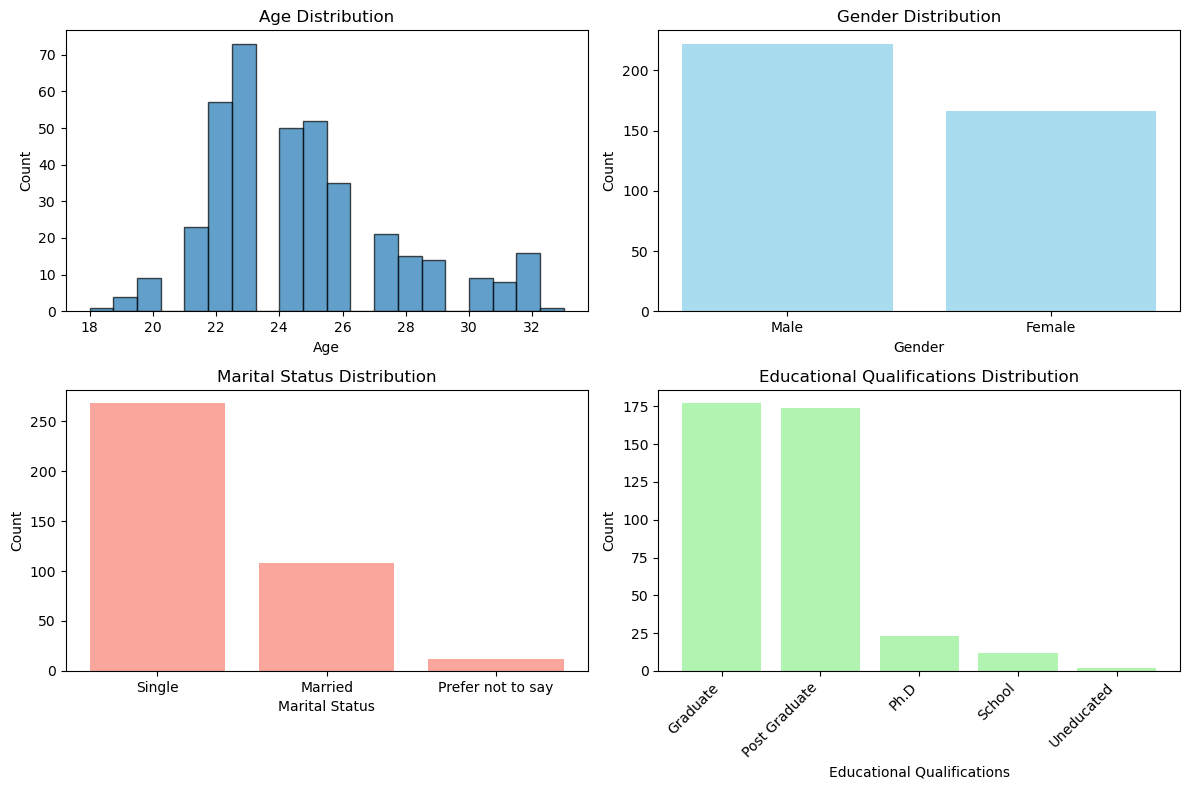

In [3]:
## Exploratory Data Analysis

# Summary statistics for numerical columns
numerical_cols = ['Age']
summary_stats = data[numerical_cols].describe()

# Count of customers by gender
gender_counts = data['Gender'].value_counts()

# Count of customers by marital status
marital_status_counts = data['Marital Status'].value_counts()

# Count of customers by educational qualifications
edu_counts = data['Educational Qualifications'].value_counts()

# Create subplots for demographic visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot age distribution
axes[0, 0].hist(data['Age'], bins=20, edgecolor='k', alpha=0.7)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot gender distribution
axes[0, 1].bar(gender_counts.index, gender_counts.values, color='skyblue', alpha=0.7)
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Plot marital status distribution
axes[1, 0].bar(marital_status_counts.index, marital_status_counts.values, color='salmon', alpha=0.7)
axes[1, 0].set_title('Marital Status Distribution')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Count')

# Plot educational qualifications distribution
axes[1, 1].bar(edu_counts.index, edu_counts.values, color='lightgreen', alpha=0.7)
axes[1, 1].set_title('Educational Qualifications Distribution')
axes[1, 1].set_xlabel('Educational Qualifications')
axes[1, 1].set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display the summary statistics
print("Summary Statistics for Age:")
print(summary_stats)

# Show the plots
plt.show()



#  The cells below are in response to the requirements for:

### 3. Provide Data Insights 
### a. Delivery Time Analysis: 
### i. Minimum Delivery time
###  ii. Maximum Delivery time


In [4]:
# Function to extract numeric values from the "Maximum wait time" column
def extract_numeric_wait_time(wait_time):
    try:
        return int(wait_time.split()[0])  # Extract the numeric part (e.g., 30 from "30 minutes")
    except ValueError:
        return None

#  Need to convert the wait time to numeric ---

# Apply the function to convert the column to numeric
df['Maximum wait time (numeric)'] = df['Maximum wait time'].apply(extract_numeric_wait_time)

# Drop the original "Maximum wait time" column if needed
# df.drop(columns=['Maximum wait time'], inplace=True)

# Display the DataFrame with the numeric column

In [5]:
# Group the data by location (latitude and longitude) and calculate the average wait time
location_grouped = df.groupby(['latitude', 'longitude'])['Maximum wait time (numeric)'].mean().reset_index()

# Find the maximum and minimum average wait times and their corresponding locations
max_average_wait_time = location_grouped['Maximum wait time (numeric)'].max()
min_average_wait_time = location_grouped['Maximum wait time (numeric)'].min()

# Find the locations corresponding to the maximum and minimum average wait times
max_location = location_grouped[location_grouped['Maximum wait time (numeric)'] == max_average_wait_time]
min_location = location_grouped[location_grouped['Maximum wait time (numeric)'] == min_average_wait_time]

print("Maximum Average Wait Time:", max_average_wait_time, "minutes")
print("Location with Maximum Average Wait Time:")
print(max_location)

print("\nMinimum Average Wait Time:", min_average_wait_time, "minutes")
print("Location with Minimum Average Wait Time:")
print(min_location)

Maximum Average Wait Time: 52.5 minutes
Location with Maximum Average Wait Time:
    latitude  longitude  Maximum wait time (numeric)
58   13.0078    77.5577                         52.5

Minimum Average Wait Time: 15.0 minutes
Location with Minimum Average Wait Time:
    latitude  longitude  Maximum wait time (numeric)
47   12.9866    77.4904                         15.0
71   13.0503    77.5529                         15.0
75   13.0809    77.5565                         15.0


##  Here is the time analysis

## Maximum wait times:


|   latitude   |   longitude   |   Maximum wait time (numeric)   |
|--------------|---------------|---------------------------------|
|   12.9866    |    77.4904    |              15.0               |
|   13.0503    |    77.5529    |              15.0               |
|   13.0809    |    77.5565    |              15.0               |


## Minimum wait times:
|   latitude   |   longitude   |   Maximum wait time (numeric)   |
|--------------|---------------|---------------------------------|
|   12.9866    |    77.4904    |              15.0               |
|   13.0503    |    77.5529    |              15.0               |
|   13.0809    |    77.5565    |              15.0               |


## The cells below find the:
### Find out the locality with most number of orders 


### Find out the locality with least number of orders 

In [6]:
# Group the data by latitude and longitude and count the occurrences
location_counts = data.groupby(['latitude', 'longitude']).size().reset_index(name='visit_count')

# Sort the locations by visit count in descending order to find the most visited
most_visited_location = location_counts.sort_values(by='visit_count', ascending=False).iloc[0]

# Sort the locations by visit count in ascending order to find the least visited
least_visited_location = location_counts.sort_values(by='visit_count', ascending=True).iloc[0]

# Display the most and least visited locations
print("Most Visited Location (Latitude, Longitude):", most_visited_location['latitude'], most_visited_location['longitude'])
print("Number of Visits:", most_visited_location['visit_count'])

print("\nLeast Visited Location (Latitude, Longitude):", least_visited_location['latitude'], least_visited_location['longitude'])
print("Number of Visits:", least_visited_location['visit_count'])


Most Visited Location (Latitude, Longitude): 12.977 77.5773
Number of Visits: 36.0

Least Visited Location (Latitude, Longitude): 12.8652 77.524
Number of Visits: 1.0


# Customer Satisfaction and Reviews 

## For this requirements on customer ratings, we need to convert the rating to a numeric mapping

In [7]:
# Define a mapping dictionary for the ratings
rating_mapping = {
    'Strongly agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}

# Map the values in the "Good Food quality" column to numeric ratings
df['Good Food quality (Numeric)'] = df['Good Food quality'].map(rating_mapping)

# Display the updated DataFrame
print(df[['Good Food quality', 'Good Food quality (Numeric)']])

#This code will create a new column called "Good Food quality (Numeric)" in your DataFrame, containing the numeric ratings (1 - 5) based on the mapping dictionary. You can then use this new numeric column for further analysis or calculations.

    Good Food quality  Good Food quality (Numeric)
0             Neutral                            3
1             Neutral                            3
2            Disagree                            2
3               Agree                            4
4             Neutral                            3
..                ...                          ...
383           Neutral                            3
384           Neutral                            3
385           Neutral                            3
386             Agree                            4
387          Disagree                            2

[388 rows x 2 columns]





## Customer Preference:

### i. Top 5 restaurants

In [8]:
# Group by location and calculate the average Good Food quality rating
location_avg_quality = df.groupby(['latitude', 'longitude'])['Good Food quality (Numeric)'].mean().reset_index()

# Sort locations by average rating in descending order
sorted_locations = location_avg_quality.sort_values(by='Good Food quality (Numeric)', ascending=False)

# Get the top 5 locations
top_5_locations = sorted_locations.head(5)

# Display the top 5 locations and their average ratings
print(top_5_locations)

# List restaurants in the top 5 locations
for index, row in top_5_locations.iterrows():
    location = (row['latitude'], row['longitude'])
    print(f"Top Restaurant in {location}:")
    top_restaurants = df[(df['latitude'] == location[0]) & (df['longitude'] == location[1])]
    top_restaurants = top_restaurants.sort_values(by='Good Food quality', ascending=False)
    print(top_restaurants[['latitude', 'longitude', 'Good Food quality']].head(1))
    print()

    latitude  longitude  Good Food quality (Numeric)
50   12.9890    77.5332                     5.000000
69   13.0487    77.5923                     4.875000
43   12.9847    77.5491                     4.500000
30   12.9579    77.6309                     4.500000
33   12.9662    77.6068                     4.333333
Top Restaurant in (12.989, 77.5332):
     latitude  longitude Good Food quality
255    12.989    77.5332    Strongly agree

Top Restaurant in (13.0487, 77.5923):
    latitude  longitude Good Food quality
67   13.0487    77.5923    Strongly agree

Top Restaurant in (12.9847, 77.5491):
     latitude  longitude Good Food quality
250   12.9847    77.5491    Strongly agree

Top Restaurant in (12.9579, 77.6309):
     latitude  longitude Good Food quality
152   12.9579    77.6309    Strongly agree

Top Restaurant in (12.9662, 77.6068):
     latitude  longitude Good Food quality
191   12.9662    77.6068    Strongly agree



##  Customer Preference: 
i. Top 5 restaurants 

ii. Top 5 Cuisines ordered

iii. Most ordered dish

In [11]:


# Find the most ordered "Meal(P1)"
most_ordered_meal_p1 = df['Meal(P1)'].value_counts().idxmax()

# Find the count of the most ordered meal
most_ordered_meal_p1_count = df['Meal(P1)'].value_counts().max()

print(f"The most ordered 'Meal(P1)' is '{most_ordered_meal_p1}' with a count of {most_ordered_meal_p1_count}.")

The most ordered 'Meal(P1)' is 'Snacks' with a count of 124.


## Perference(P1)

In [12]:




# Find the most ordered "Perference(P1)"
most_ordered_meal_p1 = df['Perference(P1)'].value_counts().idxmax()

# Find the count of the most ordered meal
most_ordered_meal_p1_count = df['Perference(P1)'].value_counts().max()

print(f"The most ordered 'Perference(P1)' is '{most_ordered_meal_p1}' with a count of {most_ordered_meal_p1_count}.")

The most ordered 'Perference(P1)' is 'Non Veg foods (Lunch / Dinner)' with a count of 315.


# That is the conclusion of our data analysis using python with the help of ChatGPT.  Thanks for reading!